## Generate Some Data

##### Moving average expression

####                            $y_t = 50 + 0.4\varepsilon_{t-1} + 0.3\varepsilon_{t-2} + \varepsilon_t$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

In [2]:
errors = np.random.normal(0,1,400)

In [3]:
date_index = pd.date_range(start='9/1/2019',end='1/1/2020')

In [4]:
series = []
for t in range(1,len(date_index)+1):
    series.append(50 + 0.4*errors[t-1]+0.3*errors[t-2]+errors[t])

In [5]:
series = pd.Series(series,date_index)
series = series.asfreq(pd.infer_freq(date_index))

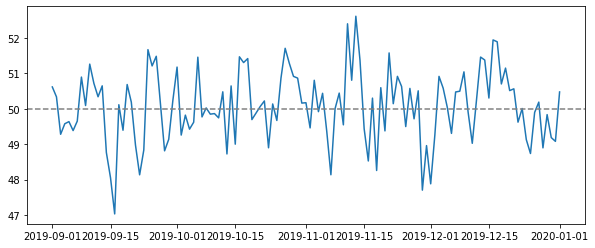

In [6]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(50,linestyle='--',color='grey')

# ACF

C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<BarContainer object of 10 artists>

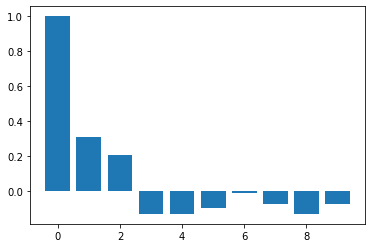

In [7]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags),acf_vals[:num_lags])

In [8]:
len(series)

123

C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1016: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


<BarContainer object of 25 artists>

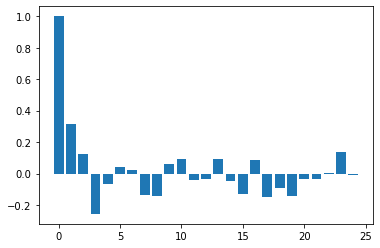

In [9]:
pacf_vals = pacf(series)
plt.bar(range(25), pacf_vals[:25])

In [10]:
train_end = datetime(2019,12,30)
test_end  = datetime(2020,1,1)
train_data = series[:train_end]
test_data = series[train_end +timedelta(days=1):test_end]

## Fit ARIMA Model

In [11]:
model = ARIMA(train_data,order=(0,0,2))

C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [12]:
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  121
Model:                     ARMA(0, 2)   Log Likelihood                -161.590
Method:                       css-mle   S.D. of innovations              0.919
Date:                Fri, 20 Nov 2020   AIC                            331.180
Time:                        12:37:23   BIC                            342.363
Sample:                    09-01-2019   HQIC                           335.722
                         - 12-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0824      0.138    363.056      0.000      49.812      50.353
ma.L1.y        0.3047      0.083      3.681      0.000       0.142       0.467
ma.L2.y        0.3552      0.090      3.960      0.0

# Predicted Model:

$y_t = 50 + 0.4\varepsilon_{t-1} + 0.3\varepsilon_{t-2} + \varepsilon_t$

In [13]:
pred_start_date = test_data.index[0]
pred_end_date  = test_data.index[-1]

In [14]:
predictions = model_fit.predict(start = pred_start_date,end= pred_end_date)
residuals = test_data - predictions

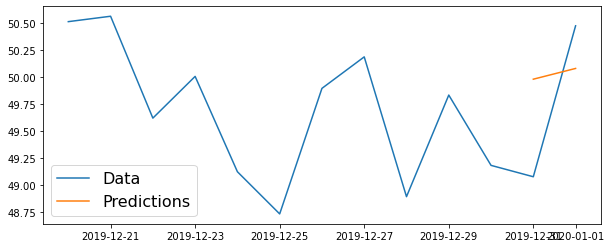

In [15]:
plt.figure(figsize=(10,4))
plt.plot(series[-13:])
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)

In [16]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0131


In [17]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.6965823094117939
